In [1]:
import tensorflow as tf 
import numpy as np
from tensorflow import keras
import tensorflow_hub as hub
import os
import random 
import shutil
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
print(len(os.listdir('C:/Users/hp/Desktop/Covid/train/COVID19/')))
print(len(os.listdir('C:/Users/hp/Desktop/Covid/train/NORMAL/')))
print(len(os.listdir('C:/Users/hp/Desktop/Covid/train/PNEUMONIA/')))

460
1266
3418


In [3]:
print(len(os.listdir('C:/Users/hp/Desktop/Covid/test/COVID19/')))
print(len(os.listdir('C:/Users/hp/Desktop/Covid/test/NORMAL/')))
print(len(os.listdir('C:/Users/hp/Desktop/Covid/test/PNEUMONIA/')))

116
317
855


In [4]:
try:
    os.mkdir('C:/Users/hp/Desktop/train-vs-val/training')
    os.mkdir('C:/Users/hp/Desktop/train-vs-val/validation')
    os.mkdir('C:/Users/hp/Desktop/train-vs-val/training/COVID19')
    os.mkdir('C:/Users/hp/Desktop/train-vs-val/validation/COVID19')
    os.mkdir('C:/Users/hp/Desktop/train-vs-val/training/NORMAL')
    os.mkdir('C:/Users/hp/Desktop/train-vs-val/validation/NORMAL')
    os.mkdir('C:/Users/hp/Desktop/train-vs-val/training/PNEUMONIA')
    os.mkdir('C:/Users/hp/Desktop/train-vs-val/validation/PNEUMONIA')
except OSError:
    pass
             

In [4]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + ' is zero length, so ignoring.')
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
    
    
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        shutil.copyfile(this_file, destination)
        
    for filename in testing_set:
        This_file = SOURCE + filename
        destination = TESTING + filename
        shutil.copyfile(This_file, destination)

In [5]:
COVID_SOURCE_DIR = 'C:/Users/hp/Desktop/Covid/train/COVID19/'
TRAINING_COVID_DIR = 'C:/Users/hp/Desktop/train-vs-val/training/COVID19/'
VALIDATING_COVID_DIR = 'C:/Users/hp/Desktop/train-vs-val/validation/COVID19/'
NORMAL_SOURCE_DIR = 'C:/Users/hp/Desktop/Covid/train/NORMAL/'
TRAINING_NORMAL_DIR = 'C:/Users/hp/Desktop/train-vs-val/training/NORMAL/'
VALIDATING_NORMAL_DIR = 'C:/Users/hp/Desktop/train-vs-val/validation/NORMAL/'
PNEUMONIA_SOURCE_DIR = 'C:/Users/hp/Desktop/Covid/train/PNEUMONIA/'
TRAINING_PNEUMONIA_DIR = 'C:/Users/hp/Desktop/train-vs-val/training/PNEUMONIA/'
VALIDATING_PNEUMONIA_DIR = 'C:/Users/hp/Desktop/train-vs-val/validation/PNEUMONIA/'

In [6]:
split_size = .9

In [12]:
split_data(COVID_SOURCE_DIR,TRAINING_COVID_DIR,VALIDATING_COVID_DIR,split_size)

In [13]:
split_data(NORMAL_SOURCE_DIR,TRAINING_NORMAL_DIR,VALIDATING_NORMAL_DIR,split_size)

In [14]:
split_data(PNEUMONIA_SOURCE_DIR,TRAINING_PNEUMONIA_DIR,VALIDATING_PNEUMONIA_DIR,split_size)

In [15]:
print(len(os.listdir('C:/Users/hp/Desktop/train-vs-val/training/COVID19')))
print(len(os.listdir('C:/Users/hp/Desktop/train-vs-val/training/NORMAL')))
print(len(os.listdir('C:/Users/hp/Desktop/train-vs-val/training/PNEUMONIA')))

414
1139
3076


In [16]:
print(len(os.listdir('C:/Users/hp/Desktop/train-vs-val/validation/COVID19')))
print(len(os.listdir('C:/Users/hp/Desktop/train-vs-val/validation/NORMAL')))
print(len(os.listdir('C:/Users/hp/Desktop/train-vs-val/validation/PNEUMONIA')))

124
343
932


In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 128)       0

In [19]:
model.compile(optimizer = 'Adam',
             loss= 'categorical_crossentropy',
             metrics=['accuracy']
             )

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAINING_DIR = 'C:/Users/hp/Desktop/train-vs-val/training'
VALIDATION_DIR = 'C:/Users/hp/Desktop/train-vs-val/validation'
train_datagen = ImageDataGenerator(rescale=1/255,
                                  zoom_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   target_size=(150,150),
                                                   batch_size=154,
                                                   class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             target_size=(150,150),
                                                             batch_size=103,
                                                             class_mode='categorical')

Found 4629 images belonging to 3 classes.
Found 1399 images belonging to 3 classes.


In [21]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs=10,
    steps_per_epoch=30,
    validation_steps=5
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30 steps, validate for 5 steps
Epoch 1/10
30/30 [==============================] - 454s 15s/step - loss: 0.9193 - accuracy: 0.6177 - val_loss: 0.7615 - val_accuracy: 0.6544
Epoch 2/10
30/30 [==============================] - 356s 12s/step - loss: 0.5908 - accuracy: 0.7468 - val_loss: 0.4407 - val_accuracy: 0.8097
Epoch 3/10
30/30 [==============================] - 357s 12s/step - loss: 0.3989 - accuracy: 0.8322 - val_loss: 0.2369 - val_accuracy: 0.9029
Epoch 4/10
30/30 [==============================] - 354s 12s/step - loss: 0.3433 - accuracy: 0.8574 - val_loss: 0.2384 - val_accuracy: 0.9223
Epoch 5/10
30/30 [==============================] - 356s 12s/step - loss: 0.3310 - accuracy: 0.8726 - val_loss: 0.2438 - val_accuracy: 0.8971
Epoch 6/10
30/30 [==============================] - 355s 12s/step - loss: 0.3006 - accuracy: 0.8856 - val_loss: 0.1847 - val_accuracy: 0.9282
Epoch 7/10
30/30 [==============================] - 360s 

In [22]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

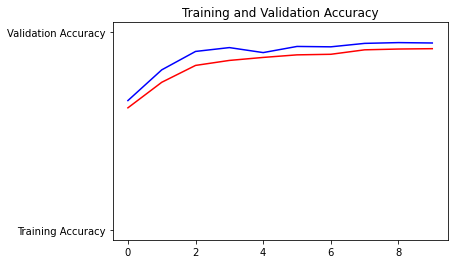

<Figure size 432x288 with 0 Axes>

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,'r','Training Accuracy')
plt.plot(epochs, val_acc,'b','Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.figure()

<Figure size 432x288 with 0 Axes>

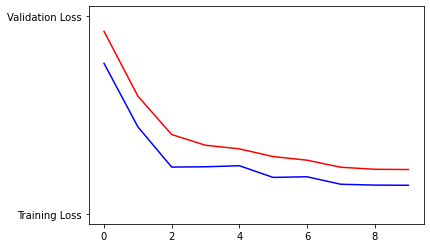

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(epochs, loss,'r', 'Training Loss')
plt.plot(epochs, val_loss,'b', 'Validation Loss')
plt.figure()

In [25]:
TEST_DIR = 'C:/Users/hp/Desktop/Covid/test/'
test_datagen = ImageDataGenerator(rescale=1/255,
                                  fill_mode='nearest')
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                             target_size=(150,150),
                                                             batch_size=103,
                                                             class_mode='categorical')

Found 1288 images belonging to 3 classes.


In [26]:
score = model.evaluate(test_generator,verbose=1)
print('Testscore:', score[0])
print('Test accuracy:', score[1])

  ...
    to  
  ['...']
13/13 [==============================] - 204s 16s/step - loss: 0.1808 - accuracy: 0.9394
Testscore: 0.1808248391518226
Test accuracy: 0.93944097


In [27]:
y_pred = model.predict_generator(test_generator)

Instructions for updating:
Please use Model.predict, which supports generators.


In [28]:
Y_pred = np.argmax(y_pred, axis=1)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
classes = ['Covid19','Normal','Pneumoinia']

In [31]:
test_generator.classes.size

1288

In [32]:
Y_pred.size

1288

In [33]:
confusion_matrix(test_generator.classes,Y_pred,labels=[0,1,2])

array([[  7,  30,  79],
       [ 25,  75, 217],
       [ 85, 188, 582]], dtype=int64)

In [35]:
model.save('covid_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: covid_model\assets
